# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: Морозов Иван

Дата выдачи: <span style="color:red">__20 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__6 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2024`

In [1]:
import numpy as np
%config InlineBackend.figure_format = 'svg'
np.random.seed(0xFFFFFFF)

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

$d\mathcal{L} =  \nabla_{\gamma} \mathcal{L} \cdot d\gamma + \nabla_{\delta} \mathcal{L} \cdot d\delta + \langle \nabla_{\tilde{y}}\mathcal{L}, d\tilde{y} \rangle = \langle \nabla_y \mathcal{L}, dy \rangle = \{y = \gamma \tilde{y} + \delta I,\ dy = d\gamma \cdot \tilde{y} + \gamma \cdot d\tilde{y} + d\delta \cdot I \} = \langle \nabla_y \mathcal{L}, d\gamma \cdot \tilde{y} \rangle + \langle \nabla_y \mathcal{L}, \gamma \cdot d\tilde{y} \rangle + \langle \nabla_y \mathcal{L}, d\delta \cdot I \rangle = $

$\boxed{\nabla_{\gamma}\mathcal{L} = (\nabla_y \mathcal{L})^T \tilde{y}}\ \boxed{\nabla_{\delta}\mathcal{L} = (\nabla_y \mathcal{L})^T I}$

$ = \{\tilde{y} = \tilde{y}(\mu(X), \sigma^2(X, \mu(X)), X) = \tilde{y}(X) \Rightarrow \underline{d\tilde{y} = J_{\tilde{y}}(X)dX\}} = \langle \nabla_y \mathcal{L}, d\gamma \cdot \tilde{y} \rangle + \langle \nabla_y \mathcal{L}, \gamma J_{\tilde{y}}(X)dX \rangle + \langle \nabla_y \mathcal{L}, d\delta \cdot I \rangle \Rightarrow \underline{\nabla_{X} \mathcal{L} = \gamma (J_{\tilde{y}}(X))^T \nabla_{y} \mathcal{L}}$

$d\tilde{y} = \left\{\tilde{y} = \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}(X - \mu I)\right\} = -\dfrac{1}{2 \sqrt{(\sigma^2 + \varepsilon)^3}}d(\sigma^2)(X - \mu I) + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}(dX - d\mu \cdot I) = \left\{d(\sigma^2) = d\left(\dfrac{1}{n}\sum\limits_{i=1}^{n}(X_i - \mu)^2\right) = d\left(\dfrac{1}{n} \langle X - \mu I, X - \mu I \rangle\right) = \dfrac{2}{n} \langle X - \mu I, d(X - \mu I) \rangle = \dfrac{2}{n}\langle X - \mu I, dX \rangle - \dfrac{2}{n} I^T(X - \mu I)d\mu\right\} = -\dfrac{1}{2 \sqrt{(\sigma^2 + \varepsilon)^3}}\left[\dfrac{2}{n}\langle X - \mu I, dX \rangle - \dfrac{2}{n} I^T(X - \mu I)d\mu\right](X - \mu I) + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}(dX - d\mu \cdot I) = \left\{\mu = \dfrac{1}{n}\sum\limits_{i=1}^{n} X_i = \dfrac{1}{n} \langle X, I \rangle, \;\; d\mu = \dfrac{1}{n}\langle I, dX \rangle\right\}  = -\dfrac{1}{2 \sqrt{(\sigma^2 + \varepsilon)^3}} \left[ \dfrac{2}{n}\langle X - \mu I, dX \rangle - \dfrac{2}{n^2} I^T(X - \mu I) \cdot \langle I, dX \rangle \right] (X - \mu I) + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}\left(dX - \left[ \dfrac{1}{n}\langle I, dX \rangle \right] \cdot I\right) = -\dfrac{1}{n \sqrt{(\sigma^2 + \varepsilon)^3}}(X - \mu I)\left(X^T - \mu I^T - \dfrac{1}{n}\left(I^T (X - \mu I) \right) I^T \right)dX + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}dX - \dfrac{1}{n \sqrt{\sigma^2 + \varepsilon}} II^T dX = \nabla_{X}\mathcal{L}  = \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}} \left[ \dfrac{-1}{n(\sigma^2 + \varepsilon)}\left( X - \mu I - \dfrac{1}{n}\left(I^T (X - \mu I)\right) I \right)(X^T - \mu I^T) + I - \dfrac{1}{n}II^T \right] dX$

$\boxed{\nabla_{X}\mathcal{L}  = \dfrac{\gamma}{\sqrt{\sigma^2 + \varepsilon}} \left[ \dfrac{-1}{n(\sigma^2 + \varepsilon)}\left( X - \mu I - \dfrac{1}{n}\left(I^T (X - \mu I)\right) I \right)(X^T - \mu I^T) + I - \dfrac{1}{n}II^T \right] \nabla_y \mathcal{L}}$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

$\mathbb{E} W^l_{ij} = \int^{+\infty}_{-\infty} xp_{W_l}(x)\,dx = \{p_{W_l}(x) = p_{W_l}(-x)\}= 0$

$\mathbb{E} y^l = \mathbb{E} y^l_i = \sum\limits_{k=1}^{n_l} \mathbb{E} W^l_{ik} \mathbb{E} x^l_k = n_l\mathbb{E} W^l \mathbb{E} x^l = \{\mathbb{E} W^l = 0\}= 0$

[Источник](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables): $y_i^l = \sum\limits_{k=1}^{n_l} W^l_{ik}x^l_k = \sum\limits_{k=1}^{n_l} Z^l_{ik}$

 $p_{Z^l}(z) = p_{Z^l_{ik}}(z) = \int\limits_{-\infty}^{+\infty} p_{x^l}(x)p_{W^l}\left(\dfrac{z}{x}\right)\dfrac{1}{|x|}dx$

$ p_{Z^l}(-z) = \int\limits_{-\infty}^{+\infty} p_{x^l}(x)p_{W^l}\left(\dfrac{-z}{x}\right)\dfrac{1}{|x|}dx = \{p_{W^l}(-x) = p_{W^l}(x)\} = p_{Z^l}(z)$


$p_{Z^l_{i, 1} + Z^l_{i, 2}}(-x) = \int\limits_{-\infty}^{+\infty} p_{Z^l}(-x-y)p_{Z^l}(y)dy = \int\limits_{-\infty}^{+\infty} p_{Z^l}(x+y)p_{Z^l}(y)dy = \{t = -y, \; dt = -dy, \; p_{Z^l}(-t) = p_{Z^l}(t)\} = \int\limits_{-\infty}^{+\infty} p_{Z^l}(x-t)p_{Z^l}(t)dt = p_{Z^l_{i, 1} + Z^l_{i, 2}}(x) = \int\limits_{-\infty}^{+\infty} p_{Z^l}(x-y)p_{Z^l}(y)dy \Rightarrow p_{y^l}(-x) = p_{y^l}(x)$


__Прямой проход__


$\mathbb{D}y^l = \mathbb{D}y^l_i
= \mathbb{D}\sum\limits_{k=1}^{n_l}W_{ik}^lx_k^l = n_l\mathbb{D}(W_{ik}^lx_k^l) = n_l(\mathbb{D}W_{ik}^l\mathbb{D}x_k^l + (\mathbb{E}W_{ik}^l)^2\mathbb{D}x_k^l + (\mathbb{E}x_k^l)^2\mathbb{D}W_{ik}^l) = n_l((\mathbb{D}W_{ik}^l + (\mathbb{E}W_{ik}^l)^2) (\mathbb{D}x_k^l + (\mathbb{E}x_k^l)^2) - (\mathbb{E}W_{ik}^l)^2(\mathbb{E}x_k^l)^2) = \{\mathbb{E}W_{ik}^l = 0\}
= n_l(\mathbb{D}W_{ik}^l\mathbb{D}x_k^l + (\mathbb{E}x_k^l)^2\mathbb{D}W_{ik}^l)
= n_l\mathbb{D}W_{ik}^l(\mathbb{D}x_k^l + (\mathbb{E}x_k^l)^2) = \{\mathbb{D}x_k^l = \mathbb{E}((x_k^l)^2) -  (\mathbb{E}x_k^l)^2\} = n_l\mathbb{D}W_{ik}^l\mathbb{E}((x_k^l)^2 = n_l\mathbb{D}W_{ik}^l\int^{+\infty}_{-\infty} (x^l_k)^2p(x)\,dx_k^{l} = n_l\mathbb{D}W_{ik}^l\int^{+\infty}_{-\infty} max(0, y_k^{l-1})^2p(y_k^{l-1})\,dy_k^{l-1} = n_l\mathbb{D}W_{ik}^l\frac{1}{2}\int^{+\infty}_{-\infty} (y_k^{l-1})^2p(y_k^{l-1})\,dy_k^{l-1} = \{\mathbb{E}y^{l-1} = 0\} = n_l\mathbb{D}W_{ik}^l\frac{1}{2}\int^{+\infty}_{-\infty} (y_k^{l-1} - \mathbb{E}y^{l-1})^2p(y_k^{l-1})\,dy_k^{l-1} = \frac{1}{2}n_l\mathbb{D}W_{ik}^l\mathbb{D}(y_k^{l-1}) \Rightarrow \mathbb{D}y^l = \frac{1}{2}n_l\mathbb{D}W^l\mathbb{D}y^{l-1} \Rightarrow \mathbb{D}y^L = \mathbb{D}y^1(\prod\limits_{l = 2}^L\frac{n_l}{2}\mathbb{D}W^l)$

$\mathbb{D}y^l = \mathbb{D}y^{l-1} \Rightarrow \boxed{\mathbb{D}W^l = \frac{2}{n_l}}$

__Обратный проход__

$\mathbb{E}\left[\frac{\partial \mathfrak{L}}{\partial y ^l}\right] = \mathbb{E}\left[\frac{\partial \mathfrak{L}}{\partial y ^l_j}\right] = \mathbb{E}\left[\delta^{l}_{j}\right] = \mathbb{E}\left[\sum\limits_{k=1}^{n_{l+2}}\delta^{l+1}_{k}\frac{\partial y^{l+1}_{k}}{\partial y^{l}_{j}}\right] = \mathbb{E}\left[\sum\limits_{k=1}^{n_{l+2}}\delta^{l+1}_{k}\frac{\partial }{\partial y^{l}_{j}}\sum\limits_{i=1}^{n_{l+1}}W^{l+1}_{ki}g(y^l_i)\right] = \mathbb{E}\left[\sum\limits_{k=1}^{n_{l+2}}\delta^{l+1}_{k}W^{l+1}_{kj}\frac{\partial g(y^l_j)}{\partial y^l_j}\right] = \mathbb{E}\left[\sum\limits_{k=1}^{n_{l+2}}\delta^{l+1}_{k}W^{l+1}_{kj}g^{\prime}(y^l_j)\right] = n_{l+2} \mathbb{E} \delta_k^{l+1} \mathbb{E}W_{kj}^{l+1}\mathbb{E}g^{\prime}y^l_j = \{\mathbb{E}W^{l+1} = 0\} = 0$

$\mathbb{D}\delta^l = n_{l+2}\mathbb{D} \delta^{l+1} \mathbb{D}W^{l+1}\mathbb{D}g^{\prime}(y^l) = \left\{\mathbb{E}y^l_j = 0,\  \frac{\partial \text{ReLU}(x)}{\partial x} = \begin{cases} 1, &  x > 0 \\ 0, & x \leq 0 \end{cases},\ (\frac{\partial \text{ReLU}(x)}{\partial x})^2 = \begin{cases} 1, &  x > 0 \\ 0, & x \leq 0 \end{cases} \Rightarrow \mathbb{E}g^{\prime}(y^l_j) = \frac12\right\} = \left\{ \mathbb{D}g^{\prime}(y^l_j) = \mathbb{E}(g^{\prime}(y^l_j)^2) - (\mathbb{E}g^{\prime}(y^l_j))^2  =\mathbb{E}g^{\prime}(y^l_j) - (\mathbb{E}g^{\prime}(y^l_j))^2 = \frac12 - \frac14 = \frac14\right\} = \frac14n_{l+2}\mathbb{D} \delta^{l+1} \mathbb{D}W^{l+1}$

$\mathbb{D}\delta^l = \mathbb{D}\delta^{l-1} \Rightarrow \boxed{ \mathbb{D}W^{l} = \frac{4}{n_{l+1}}}$

$\begin{cases}
    \mathbb{E}W^{L} = 0\\
    \mathbb{D}W^l = \frac{2}{n_l}\\
    \mathbb{D}W^l = \frac{4}{n_{l+1}}
\end{cases} \Rightarrow \begin{cases}
    \mathbb{E}W^{L} = 0\\
    \mathbb{D}W^{L} = \frac{2}{\frac{n_{l}}{2} + \frac{n_{l+1}}{4}} = \frac{8}{2n^{\text{in}} + n^{\text{out}}}
\end{cases} \Rightarrow W^{L}_{ij} \sim \mathcal{N}(0, \frac{8}{2n^{\text{in}} + n^{\text{out}}})$


### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

* Проблема затухания градиента: Одним из главных недостатков сигмоидной функции является быстрое затухание градиента на краях области определения, где градиент приближается к нулю. Это происходит из-за насыщения сигмоидной функции на больших или малых значениях, что приводит к малым значениям градиента и затуханию градиентов в глубоких сетях. В результате, градиенты, распространяющиеся обратно к начальным слоям, становятся слишком маленькими, что замедляет обучение или делает его невозможным. ReLU решает эту проблему, поскольку у него постоянный градиент для положительных значений входа, равный 1. Это означает, что градиенты не затухают, а остаются постоянными для всех положительных значений, что способствует более эффективному распространению градиентов по сети.

* Быстрая сходимость: Функция ReLU обычно приводит к более быстрой сходимости в процессе обучения, особенно в глубоких нейронных сетях. Это происходит благодаря отсутствию насыщения на больших положительных значениях, что позволяет активированным нейронам быстро начинать обучаться на начальных этапах. В то время как сигмоидная функция может приводить к медленной сходимости, она медленно насыщается на краях области определения.

* Разреженность активаций: Функция ReLU создает разреженные активации в сети, что означает, что только небольшое количество нейронов активируется в ответ на определенные входные данные. Это может сделать представления сети более эффективными и экономичными, поскольку большинство нейронов остаются неактивными (отрицательные входы), и их веса не нужно обновлять. В случае с сигмоидной функцией активации, активации нейронов могут быть более плотными, что требует больше ресурсов для обучения и выполнения.

* Вычислительная эффективность: Функция ReLU требует меньше вычислительных ресурсов для оценки, поскольку она просто пропускает положительные значения без изменений и требует только одну операцию сравнения. В то время как для вычисления сигмоидной функции требуется выполнить операцию экспоненты, которая является более затратной по вычислительным ресурсам. Кроме того, использование ReLU позволяет сети обрабатывать более большие объемы данных за меньшее время благодаря его более быстрой сходимости и разреженности активаций.

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.input = input
        return np.maximum(0, input)
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        grad_input = grad_output * (self.input > 0)
        return grad_input, []
    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [4]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [5]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.input = input
        return np.dot(input, self.params[0]) + self.params[1]

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        return np.dot(grad_output, self.weights.T), np.r_[np.dot(self.input.T, grad_output).ravel(),
                                                          np.sum(grad_output, axis=0).ravel()]
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [6]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:


$$
\text{ReLU}(x) = \max(0, x)
$$

$$
\frac{\partial f}{\partial x} = \sum_i \frac{\partial f}{\partial y_i} \frac{\partial y_i}{\partial x}
$$


$$
\frac{\partial \text{ReLU}(x)}{\partial x} = \begin{cases} 
1, & \text{если } x > 0 \\
0, & \text{иначе}
\end{cases}$$

$$
\dfrac{\partial f}{\partial x_i} = \dfrac{\partial f}{\partial y_i} \dfrac{\partial y_i}{\partial x_i} = \begin{cases} 
1, & \text{если } x_i > 0 \\
0, & \text{иначе}
\end{cases}
$$









Следующая ячейка после заполнения должна не выдавать ошибку :)

In [7]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

relu.forward(points)
grads = relu.backward(np.ones((10, 12)))[0]

numeric_grads = np.zeros(points.shape)
for i in range(len(points)):
  numeric_grads[i] = eval_numerical_gradient(lambda x: np.sum(relu.forward(x), axis=1), points[i].reshape((1, -1)))

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):


$$
df = \frac{\partial f}{\partial y} \cdot dy
$$


$$
dy = \frac{\partial y}{\partial x} \cdot dx = W \cdot dx
$$

$$
df = \frac{\partial f}{\partial y} \cdot W \cdot dx
$$

Так как $ f(y) = \sum_i y_i $, то $ \frac{\partial f}{\partial y} = 1 $.


$$
\frac{\partial f}{\partial x} = \frac{\partial f}{\partial y} \cdot W = W^T
$$




Следующая ячейка после заполнения должна не выдавать ошибку :)

In [8]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

linear.forward(points)
grads = linear.backward(np.ones((10, 32)))[0]
numeric_grads = np.zeros(points.shape)

for i in range(len(points)):
  numeric_grads[i] = eval_numerical_gradient(lambda x: np.sum(linear.forward(x), axis=1), points[i].reshape((1, -1)))

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [9]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [10]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        self.output = input - logsumexp(input, axis=1, keepdims=True)
        return self.output
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        return grad_output - np.exp(self.output) * grad_output.sum(axis=1).reshape(-1, 1), []
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [11]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    log_probs = activations[np.arange(target.shape[0]), target]
    loss = -np.mean(log_probs)
    return loss


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    grad = np.zeros_like(activations)
    grad[np.arange(len(target)), target] = -1
    return 1 / len(target) * grad

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [12]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

lsm.forward(points)
grads = lsm.backward(grad_NLL(lsm.output, target))[0]
NLL(lsm.forward(points), target)
numeric_grads = eval_numerical_gradient(lambda x: NLL(lsm.forward(x), target), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.datasets import load_digits

In [15]:
X, y = load_digits(return_X_y=True)

In [16]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [20]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []
    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [21]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [22]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    output = X
    for layer in network:
        output = layer.forward(output)
    return output

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [23]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    return np.argmax(forward(network, X), axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [24]:
from scipy.optimize import minimize

In [25]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [26]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [27]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    logits = forward(network, X)
    loss = NLL(logits, y)
    backward_grads = grad_NLL(logits, y)
    all_grads = []
    for layer in reversed(network):
        backward_grads, layer_grads = layer.backward(backward_grads)
        all_grads.append(layer_grads)
    return loss, np.hstack(all_grads[::-1])
    

Теперь мы готовы обучать нашу нейросеть. 

In [28]:
weights = get_weights(network)

In [29]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [30]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [31]:
res["nit"] # number of iterations (should be >> 10)

77

In [32]:
res["success"] # should be True

True

In [33]:
res["x"] # leraned weights

array([-9.68763192e-04,  7.62398734e-03, -1.89689920e-03, ...,
       -8.45268185e-01, -2.24138028e+00, -6.51112331e-01])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [34]:
from sklearn.metrics import accuracy_score
set_weights(res["x"], network)
NLL_train = NLL(forward(network, X_train), y_train)
NLL_test = NLL(forward(network, X_test), y_test)
train_accuracy = accuracy_score(y_train, predict(network, X_train))
test_accuracy = accuracy_score(y_test, predict(network, X_test))

print("Train NLL: {:.5f}".format(NLL_train))
print("Test NLL: {:.5f}".format(NLL_test))
print("Train accuracy: {:.5f}".format(train_accuracy))
print("Test accuracy: {:.5f}".format(test_accuracy))

Train NLL: 0.00000
Test NLL: 0.77248
Train accuracy: 1.00000
Test accuracy: 0.95333


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [35]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        set_weights(weights, self.network)
        train_predictions = predict(self.network, self.X_train)
        test_predictions = predict(self.network, self.X_test)
        train_accuracy = accuracy_score(self.y_train, train_predictions)
        test_accuracy = accuracy_score(self.y_test, test_predictions)
        self.train_acc.append(accuracy_score(self.y_train, train_predictions))
        self.test_acc.append(accuracy_score(self.y_test, test_predictions))
        if self.print:
            print("Train accuracy: {:.5f}".format(train_accuracy))
            print("Test accuracy: {:.5f}".format(test_accuracy))

In [36]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Train accuracy: 0.10616
Test accuracy: 0.08444
Train accuracy: 0.19005
Test accuracy: 0.16667
Train accuracy: 0.18931
Test accuracy: 0.16667
Train accuracy: 0.17817
Test accuracy: 0.16444
Train accuracy: 0.27468
Test accuracy: 0.29333
Train accuracy: 0.23905
Test accuracy: 0.25111
Train accuracy: 0.26800
Test accuracy: 0.28889
Train accuracy: 0.40460
Test accuracy: 0.41111
Train accuracy: 0.45805
Test accuracy: 0.46000
Train accuracy: 0.62584
Test accuracy: 0.61778
Train accuracy: 0.66889
Test accuracy: 0.63111
Train accuracy: 0.64885
Test accuracy: 0.59778
Train accuracy: 0.74313
Test accuracy: 0.71556
Train accuracy: 0.77431
Test accuracy: 0.73778
Train accuracy: 0.78471
Test accuracy: 0.75333
Train accuracy: 0.79584
Test accuracy: 0.75333
Train accuracy: 0.81366
Test accuracy: 0.76889
Train accuracy: 0.87305
Test accuracy: 0.80667
Train accuracy: 0.87157
Test accuracy: 0.84889
Train accuracy: 0.87676
Test accuracy: 0.86667
Train accuracy: 0.88493
Test accuracy: 0.86000
Train accurac

Изобразите на графике кривую качества на обучени и контроле по итерациям:

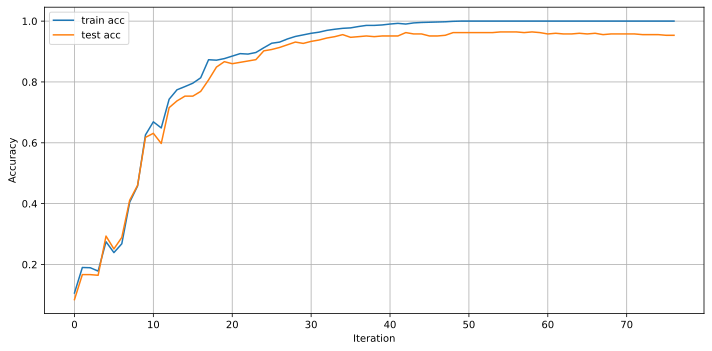

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [38]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [39]:
for i in range(5):
  for j in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, i + 1, ReLU)
    cb = Callback(network, X_train, y_train, X_test, y_test)
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i][j] = cb.train_acc[-1]
    accs_test[i][j] = cb.test_acc[-1]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

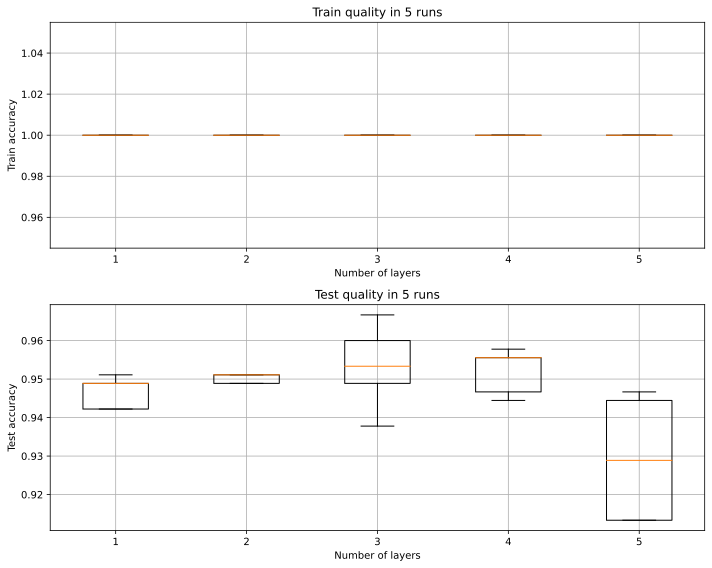

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

1. На обучении качество идеальное вне зависимости от числа слоёв, разброс нулевой. При увеличении количества слоёв с 1 до 3 качество на тесте повышается, при дальнейшем увеличении количества слоёв до 5 начинает понижаться. Модель может начать запоминать обучающие примеры вместо обобщения общих закономерностей. С увеличением количества слоёв устойчивость обучения понижается (возрастает разброс). Увеличение числа слоёв может сделать процесс обучения менее стабильным из-за проблемы исчезающего градиента или взрывного градиента, особенно при использовании глубоких нейронных сетей.
2. Качество логистической регрессии может быть лучше, чем нелинейной модели с большим числом слоёв, однако линейная модель проигрывает нелинейной с небольшим числом слоёв в качестве при решениии простой задачи. Кроме того, логистическая регрессия имеет малый разброс. Таким образом, нельзя сказать, что логистическая регрессия дает качество хуже, чем нелинейная модель.

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [42]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                layer.weights = np.random.randn(input_units, output_units) * np.sqrt(2 / (input_units + output_units))
            elif initialization == 'Xavier':
                lim = np.sqrt(6 / (input_units + output_units))
                layer.weights = np.random.uniform(-lim, lim, size=(input_units, output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [43]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [44]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [45]:
for i in range(len(init_vars)):
  for j in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
    cb = Callback(network, X_train, y_train, X_test, y_test)
    initialize_network(network, init_vars[i])
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i][j] = cb.train_acc[-1]
    accs_test[i][j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

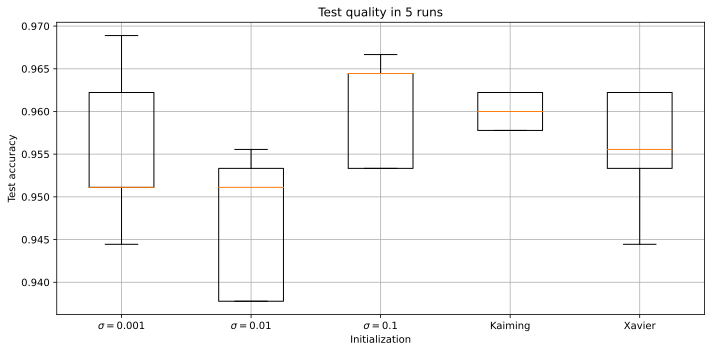

In [46]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [47]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [48]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [49]:
for i in range(len(init_vars)):
  for j in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    cb = Callback(network, X_train, y_train, X_test, y_test)
    initialize_network(network, init_vars[i])
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i][j] = cb.train_acc[-1]
    accs_test[i][j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

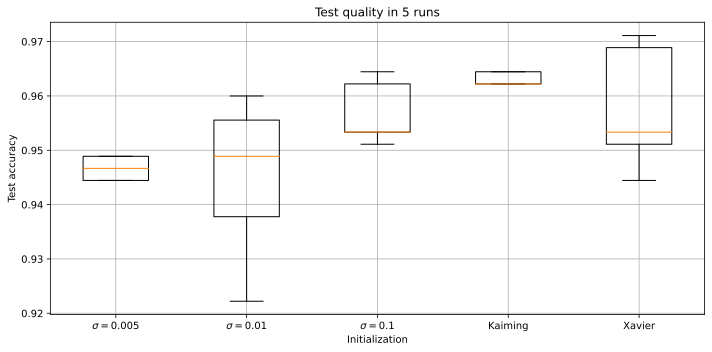

In [50]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [51]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [52]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [53]:
for i in range(len(init_vars)):
  for j in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
    cb = Callback(network, X_train, y_train, X_test, y_test)
    initialize_network(network, init_vars[i])
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i][j] = cb.train_acc[-1]
    accs_test[i][j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

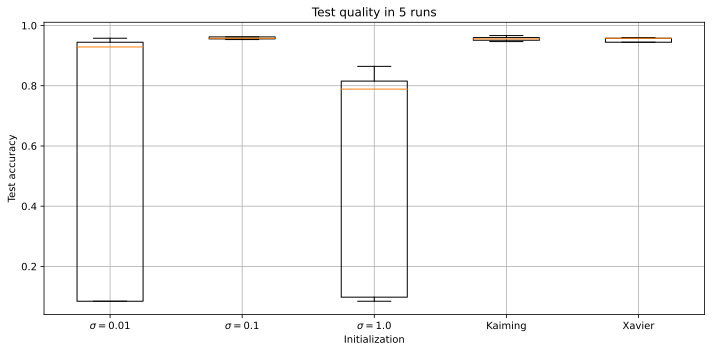

In [54]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__
"комментарий к вопросу" - в условии было сказано провести анализ только для теста и боксплоты были заранее для теста даны.
1. Неглубокие сети (3-4 слоя). Наилучшего качества для неглубоких сетей удалось достичь инициализацией нормальным распределением с большим стандартным отклонением (0.1 против 0.001 и 0.01). Однако при увеличении отклонения растёт разброс. Kaiming и Хavier отличаются низким разбросом. Стоит отметить что для 4 слоёв разброс для всех инициализаций меньше, чем для 3. Можно сделать общий вывод: чем больше дисперсия распределения, тем неустойчивее модель (больше возможностей сойтись в локальные минимумы). Инициализация Xavier и Kaiming помогают увеличить устойчивость процесса обучения за счет более эффективного распределения градиентов в глубоких слоях сети. Эти методы инициализации могут помочь избежать проблем затухания или взрыва градиентов, что обеспечивает более стабильный процесс обучения.
2. Глубокие сети (5 слоёв). Нормальное распределение при неудачном выборе стандартного отклонения может дать плохие результаты (высокий разброс). Таким образом, для глубоких сетей лучше подходят Kaiming и Хavier (они учитывают размеры слоёв в отличие от нормального распределения).

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [55]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [56]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [57]:
for init in init_vars:
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    cb = Callback(network, X_train, y_train, X_test, y_test)
    initialize_network(network, init)
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_test_on_iterations.append(cb.test_acc.copy())
    accs_train_on_iterations.append(cb.train_acc.copy())

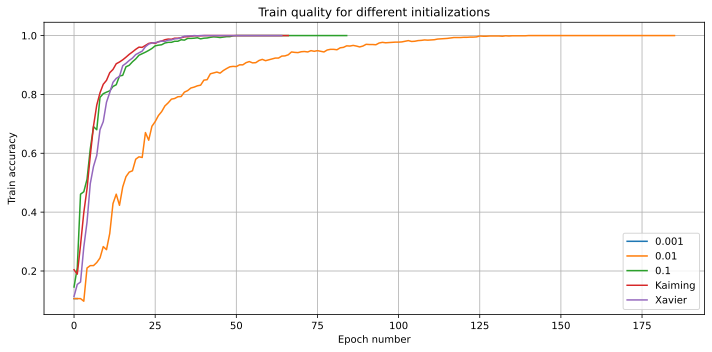

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars):
    ax.plot(accs_train_on_iterations[idx], label=label)

ax.set_title("Train quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Train accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

Наибольшей скоростью обучения обладают Kaiming и Xavier. Чем больше дисперсия, тем выше скорость обучения ("проще" дойти до минимума).
1. Инициализация Xavier и Kaiming:
эти методы инициализации часто способствуют более быстрой сходимости процесса обучения. Это происходит потому, что они учитывают размер входного и выходного слоев при расчете начальных весов, что помогает в градиентном спуске. При использовании методов Xavier и Kaiming градиенты распространяются более равномерно и эффективно по слоям сети, что обычно ускоряет обучение.
Кроме того, за счет более стабильного распределения весов в начале обучения, сеть начинает сходиться быстрее к оптимальным решениям.
2. Нормальное распределение:
при использовании этого метода инициализации скорость обучения может быть медленнее.
Это может происходить из-за несбалансированного распределения начальных весов, что может замедлить сходимость градиентного спуска.

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [60]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.input = input
        return np.tanh(input)

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (1 - np.tanh(self.input) ** 2), []

    def __repr__(self):
        return 'Tanh()'

In [61]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.input = input
        self.output = expit(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return self.output * (1 - self.output) * grad_output, []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [62]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [63]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [64]:
for i in range(3):
  for j in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 3, [Tanh, Sigmoid, ReLU][i])
    cb = Callback(network, X_train, y_train, X_test, y_test)
    initialize_network(network, init_for_act_funcs[i])
    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i][j] = cb.train_acc[-1]
    accs_test[i][j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

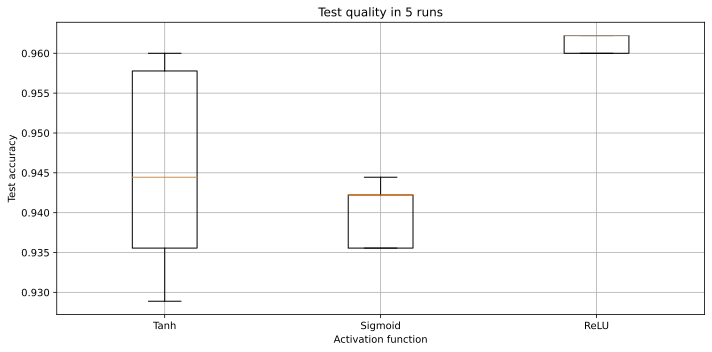

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

* Качество на обучении и контроле:
ReLU демонстрирует лучшее качество по сравнению с гиперболическим тангенсом и сигмоидой. Это связано с тем, что ReLU помогает сети избежать проблемы затухания градиентов и способствует более быстрой сходимости.
Сигмоида и гиперболический тангенс обладают ограниченным диапазоном значений, что может вызывать проблему затухания градиентов. Это приводит к более низкому качеству на обучении и контроле.
* Устойчивость процесса обучения:
ReLU менее подвержен проблемам затухания градиентов, что делает обучение более устойчивым.
Сигмоидальная функция и гиперболический тангенс имеют проблему затухания градиентов. Это приводит к более нестабильному процессу обучения. Однако в данном эксперименте разброс сигмоидальной функции не очень большой, возможно, это связано с простотой задачи.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [66]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    momentum = np.zeros_like(x0)
    for t in range(1, n_iter + 1):
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, len(X), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            if jac:
                loss, grad = fun(x0, (net, X_batch, y_batch))
            else:
                loss = fun(x0, (net, X_batch, y_batch))
                grad = jac(x0, (net, X_batch, y_batch))
            if mu != 0:
                if t > 1:
                    momentum = mu * momentum + grad
                else:
                    momentum = grad
                grad = momentum
            x0 = np.array(x0)
            grad = np.array(grad)
            x0 -= gamma * grad
        callback(x0)
    return OptimizeResult(x=x0)

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [67]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test):
        self.network = network
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.train_acc = []
        self.test_acc = []
        
    def __call__(self, weights):
        set_weights(weights, self.network)
        train_pred = predict(self.network, self.X_train)
        test_pred = predict(self.network, self.X_test)
        train_accuracy = np.mean(train_pred == self.y_train)
        test_accuracy = np.mean(test_pred == self.y_test)
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)
        print(f"Iteration {len(self.train_acc)}: Train accuracy = {train_accuracy:.5f}, Test accuracy = {test_accuracy:.5f}")


In [68]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    logits = forward(network, X)
    loss = NLL(logits, y)
    backward_grads = grad_NLL(logits, y)
    all_grads = []
    for layer in reversed(network):
        backward_grads, layer_grads = layer.backward(backward_grads)
        all_grads.append(layer_grads)
    return loss, np.hstack(all_grads[::-1])

Iteration 1: Train accuracy = 0.10468, Test accuracy = 0.08222
Iteration 2: Train accuracy = 0.10468, Test accuracy = 0.08222
Iteration 3: Train accuracy = 0.20416, Test accuracy = 0.16667
Iteration 4: Train accuracy = 0.51002, Test accuracy = 0.46889
Iteration 5: Train accuracy = 0.79436, Test accuracy = 0.77556
Iteration 6: Train accuracy = 0.90200, Test accuracy = 0.88889
Iteration 7: Train accuracy = 0.94135, Test accuracy = 0.92222
Iteration 8: Train accuracy = 0.92799, Test accuracy = 0.91111
Iteration 9: Train accuracy = 0.96140, Test accuracy = 0.92667
Iteration 10: Train accuracy = 0.95917, Test accuracy = 0.93778
Iteration 11: Train accuracy = 0.94358, Test accuracy = 0.92444
Iteration 12: Train accuracy = 0.98144, Test accuracy = 0.96000
Iteration 13: Train accuracy = 0.95620, Test accuracy = 0.93778
Iteration 14: Train accuracy = 0.95323, Test accuracy = 0.92889
Iteration 15: Train accuracy = 0.98515, Test accuracy = 0.95778
Iteration 16: Train accuracy = 0.98515, Test accu

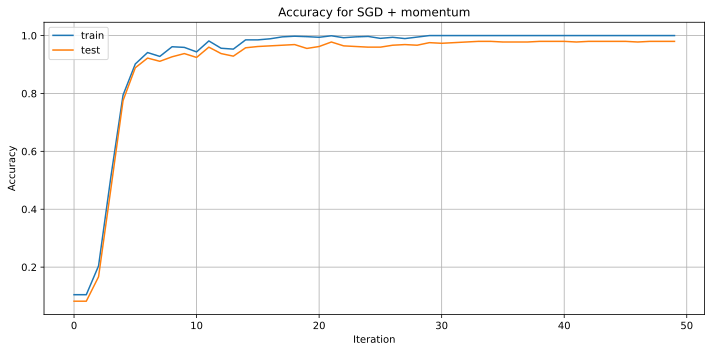

In [69]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)

def loss_grad(weights, args):
    network, X_batch, y_batch = args
    set_weights(weights, network)
    loss, grad = compute_loss_grad(weights, args)
    return loss, grad.flatten()

callback = Callback(network, X_train, y_train, X_test, y_test)

result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
             callback=callback, momentum=0.9, n_iter=50, lr=0.01, jac=True, batch_size=32)

set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}")
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(callback.train_acc, label="train")
ax.plot(callback.test_acc, label="test")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for SGD + momentum")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()



**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [70]:
import time
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test):
        self.network = network
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.train_acc = []
        self.test_acc = []
        self.time = []
        self.start = time.time()
        
    def __call__(self, weights):
        set_weights(weights, self.network)
        train_pred = predict(self.network, self.X_train)
        test_pred = predict(self.network, self.X_test)
        train_accuracy = np.mean(train_pred == self.y_train)
        test_accuracy = np.mean(test_pred == self.y_test)
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)
        self.time.append(time.time() - self.start)
        self.start = time.time()
        #print(f"Iteration {len(self.train_acc)}: Train accuracy = {train_accuracy:.5f}, Test accuracy = {test_accuracy:.5f}")

In [71]:
#LBFGS-B
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb = Callback(network, X_train, y_train, X_test, y_test)

res = minimize(
    compute_loss_grad, get_weights(network),  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb
)
print(res.keys(), res["nit"], res["success"])
set_weights(res.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}")
        

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv']) 127 True
Final test accuracy: 0.94667


In [72]:
# SGD
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
for lr in [1e-3, 1e-2, 1e-1]:
    for batch_size in [8, 32]:
        network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
        cb2 = Callback(network, X_train, y_train, X_test, y_test)
        result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
             callback=cb2, momentum=0, n_iter=100, lr=lr, jac=True, batch_size=batch_size)
        set_weights(result.x, network)
        test_pred = predict(network, X_test)
        test_accuracy = np.mean(test_pred == y_test)
        print(f"Final test accuracy: {test_accuracy:.5f}, lr: {lr}, batch_size: {batch_size}")

Final test accuracy: 0.89556, lr: 0.001, batch_size: 8
Final test accuracy: 0.16667, lr: 0.001, batch_size: 32
Final test accuracy: 0.96667, lr: 0.01, batch_size: 8
Final test accuracy: 0.94889, lr: 0.01, batch_size: 32
Final test accuracy: 0.16222, lr: 0.1, batch_size: 8
Final test accuracy: 0.96889, lr: 0.1, batch_size: 32


In [73]:
# SGD + momentum
def loss_grad(weights, args):
    network, X_batch, y_batch = args
    set_weights(weights, network)
    loss, grad = compute_loss_grad(weights, args)
    return loss, grad.flatten()
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
for lr in [1e-3, 1e-2, 1e-1]:
    for batch_size in [8, 32]:
        network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
        cb2 = Callback(network, X_train, y_train, X_test, y_test)
        result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
             callback=cb2, momentum=0.9, n_iter=100, lr=lr, jac=True, batch_size=batch_size)
        set_weights(result.x, network)
        test_pred = predict(network, X_test)
        test_accuracy = np.mean(test_pred == y_test)
        print(f"Final test accuracy: {test_accuracy:.5f}, lr: {lr}, batch_size: {batch_size}")

Final test accuracy: 0.96222, lr: 0.001, batch_size: 8
Final test accuracy: 0.95333, lr: 0.001, batch_size: 32
Final test accuracy: 0.27556, lr: 0.01, batch_size: 8
Final test accuracy: 0.97556, lr: 0.01, batch_size: 32
Final test accuracy: 0.10667, lr: 0.1, batch_size: 8
Final test accuracy: 0.08444, lr: 0.1, batch_size: 32


In [74]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb2 = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb2, momentum=0, n_iter=100, lr=0.01, jac=True, batch_size=8)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {8}")

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb3 = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb3, momentum=0.9, n_iter=100, lr=0.01, jac=True, batch_size=32)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {32}")

Final test accuracy: 0.95778, lr: 0.01, batch_size: 8
Final test accuracy: 0.96444, lr: 0.01, batch_size: 32


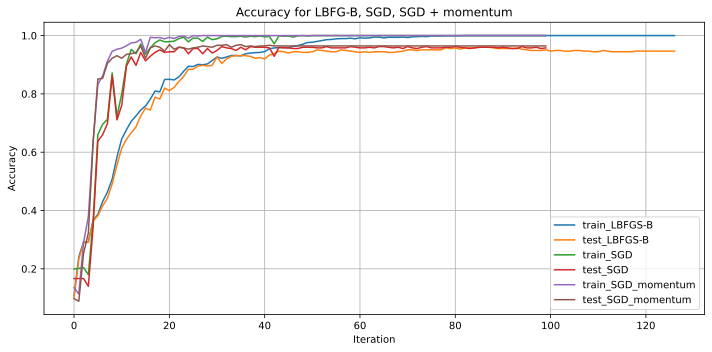

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train_LBFGS-B")
ax.plot(cb.test_acc, label="test_LBFGS-B")
ax.plot(cb2.train_acc, label="train_SGD")
ax.plot(cb2.test_acc, label="test_SGD")
ax.plot(cb3.train_acc, label="train_SGD_momentum")
ax.plot(cb3.test_acc, label="test_SGD_momentum")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for LBFG-B, SGD, SGD + momentum")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

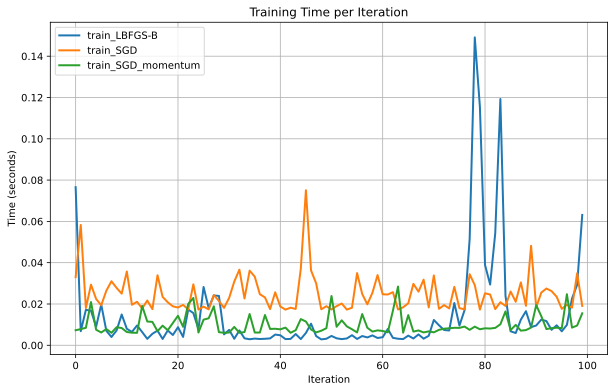

In [76]:

iterations = range(100)


plt.figure(figsize=(10, 6))
plt.plot(iterations, cb.time[:100], label='train_LBFGS-B', linewidth=2)
plt.plot(iterations, cb2.time, label='train_SGD', linewidth=2)
plt.plot(iterations, cb3.time, label='train_SGD_momentum', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Training Time per Iteration')
plt.legend()
plt.grid(True)
plt.show()


**Выводы:**

LBFGS-B медленнее сходится, чем SGD. SGD + momentum быстрее сходится, чем SGD, поскольку делает меньше "шагов в сторону". LBFGS-B является квазиньютоновским методом, который обычно достигает хороших результатов для задач оптимизации с гладкими функциями потерь и небольшим количеством параметров. Он может быть неэффективным для больших нейронных сетей из-за высокого вычислительного объема и большого объема памяти (время на выполнение 1 итерации у него больше, чем у SGD). Он также требует больше памяти для хранения информации о градиентах и обратных гессианах. SGD с моментом обычно более устойчив к изменениям градиента и дает более предсказуемое поведение во время обучения.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

Final test accuracy: 0.96222, lr: 0.01, batch_size: 8
Final test accuracy: 0.93778, lr: 0.01, batch_size: 32


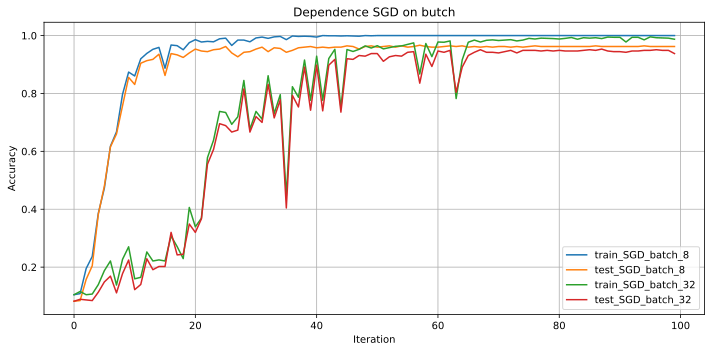

In [77]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb2 = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb2, momentum=0, n_iter=100, lr=0.01, jac=True, batch_size=8)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {8}")

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb3 = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb3, momentum=0, n_iter=100, lr=0.01, jac=True, batch_size=32)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {32}")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb2.train_acc, label="train_SGD_batch_8")
ax.plot(cb2.test_acc, label="test_SGD_batch_8")
ax.plot(cb3.train_acc, label="train_SGD_batch_32")
ax.plot(cb3.test_acc, label="test_SGD_batch_32")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Dependence SGD on butch")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Final test accuracy: 0.08444, lr: 0.01, batch_size: 8
Final test accuracy: 0.96444, lr: 0.01, batch_size: 32


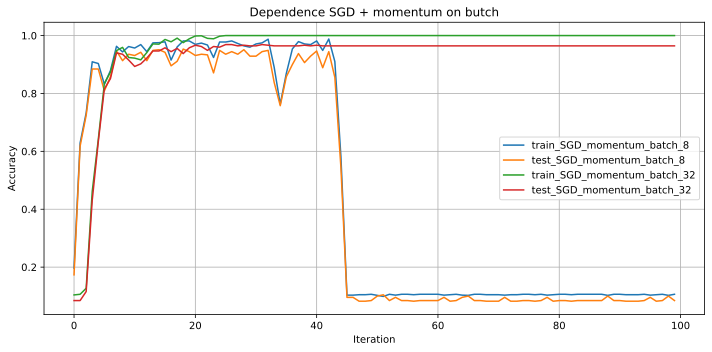

In [78]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb2 = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb2, momentum=0.9, n_iter=100, lr=0.01, jac=True, batch_size=8)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {8}")

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb3 = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb3, momentum=0.9, n_iter=100, lr=0.01, jac=True, batch_size=32)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {32}")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb2.train_acc, label="train_SGD_momentum_batch_8")
ax.plot(cb2.test_acc, label="test_SGD_momentum_batch_8")
ax.plot(cb3.train_acc, label="train_SGD_momentum_batch_32")
ax.plot(cb3.test_acc, label="test_SGD_momentum_batch_32")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Dependence SGD + momentum on butch")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Ответ:**

В SGD batch_size влияет на скорость обучения и стабильность процесса обучения. Больший batch_size уменьшает скорость сходимости, но может приводить к более шумным обновлениям. Меньший batch_size уменьшает шум. 
В SGD с моментумом batch_size влияет на стабильность обучения и эффективность использования моментума. Больший batch_size помогает в уменьшении осцилляций и ускорении сходимости. Однако использование слишком большого batch_size уменьшает эффективность моментума, поскольку обновления будут более сглаженными. Малый batch_size может привести к отсутствию сходимости.

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

In [79]:
def Adam(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    beta1 = kwargs['beta1']
    beta2 = kwargs['beta2']
    eps = kwargs['eps']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    m = np.zeros_like(x0)
    v = np.zeros_like(x0)
    t = 0
    for _ in range(n_iter):
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, len(X), batch_size):
            t += 1
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            if jac:
                loss, grad = fun(x0, (net, X_batch, y_batch))
            else:
                loss = fun(x0, (net, X_batch, y_batch))
                grad = jac(x0, (net, X_batch, y_batch))
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * grad**2
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            x0 -= gamma * m_hat / (np.sqrt(v_hat) + eps)
        callback(x0)
    
    return OptimizeResult(x=x0)


Final test accuracy: 0.97556


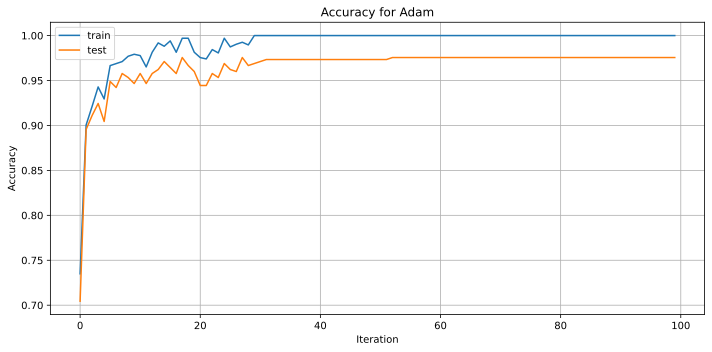

In [80]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)

def loss_grad(weights, args):
    network, X_batch, y_batch = args
    set_weights(weights, network)
    loss, grad = compute_loss_grad(weights, args)
    return loss, grad.flatten()

callback = Callback(network, X_train, y_train, X_test, y_test)

result = Adam(loss_grad, get_weights(network), (network, X_train, y_train), 
             callback=callback, beta1=0.9, beta2=0.999 ,eps=1e-7, n_iter=100, lr=0.01, jac=True, batch_size=32)

set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}")
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(callback.train_acc, label="train")
ax.plot(callback.test_acc, label="test")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for Adam")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()


In [81]:
#SGD+momentum

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb = Callback(network, X_train, y_train, X_test, y_test)
result = SGD(loss_grad, get_weights(network), (network, X_train, y_train), 
    callback=cb, momentum=0.9, n_iter=100, lr=0.01, jac=True, batch_size=32)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {8}")

Final test accuracy: 0.97333, lr: 0.01, batch_size: 8


In [82]:
#Customization Adam
for lr in [1e-3, 1e-2, 1e-1]:
    for batch_size in [8, 32]:
        network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
        cb2 = Callback(network, X_train, y_train, X_test, y_test)
        result = Adam(loss_grad, get_weights(network), (network, X_train, y_train), 
             callback=callback, beta1=0.9, beta2=0.999 ,eps=1e-7, n_iter=100, lr=lr, jac=True, batch_size=batch_size)
        set_weights(result.x, network)
        test_pred = predict(network, X_test)
        test_accuracy = np.mean(test_pred == y_test)
        print(f"Final test accuracy: {test_accuracy:.5f}, lr: {lr}, batch_size: {batch_size}")

Final test accuracy: 0.95333, lr: 0.001, batch_size: 8
Final test accuracy: 0.94889, lr: 0.001, batch_size: 32
Final test accuracy: 0.91333, lr: 0.01, batch_size: 8
Final test accuracy: 0.97556, lr: 0.01, batch_size: 32
Final test accuracy: 0.10000, lr: 0.1, batch_size: 8
Final test accuracy: 0.10667, lr: 0.1, batch_size: 32


Final test accuracy: 0.96667, lr: 0.01, batch_size: 32


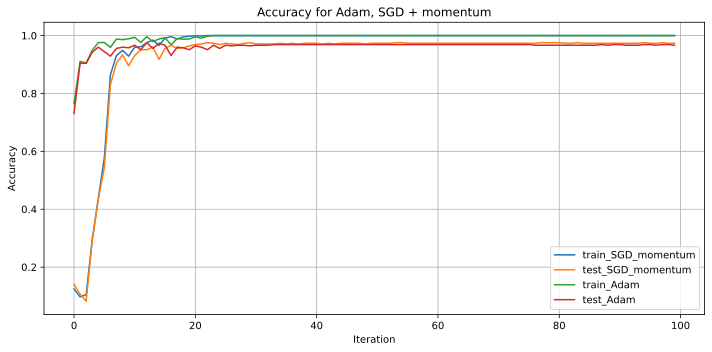

In [83]:


network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb_ad = Callback(network, X_train, y_train, X_test, y_test)
result = Adam(loss_grad, get_weights(network), (network, X_train, y_train), 
             callback=cb_ad, beta1=0.9, beta2=0.999 ,eps=1e-7, n_iter=100, lr=0.01, jac=True, batch_size=32)
set_weights(result.x, network)
test_pred = predict(network, X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Final test accuracy: {test_accuracy:.5f}, lr: {0.01}, batch_size: {32}")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train_SGD_momentum")
ax.plot(cb.test_acc, label="test_SGD_momentum")
ax.plot(cb_ad.train_acc, label="train_Adam")
ax.plot(cb_ad.test_acc, label="test_Adam")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for Adam, SGD + momentum")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

* Выводы: Adam сходится быстрее, чем SGD с моментом. Это может быть обусловлено адаптивным изменением скорости обучения и использованием оценок моментов первого и второго порядков. Adam обеспечивает более стабильный процесс обучения. Adam позволяет достигнуть лучшего качества.

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [85]:
import numpy as np

class Dropout:
    def __init__(self, dropout_prob):
        self.dropout_prob = dropout_prob
        self.params = []

    def forward(self, input, training=True):
        if training:
            self.mask = np.random.binomial(1, 1 - self.dropout_prob, size=input.shape) / (1 - 1 * self.dropout_prob)
            output = input * self.mask
        else:
            output = input * (1 - self.dropout_prob)
        return output

    def backward(self, grad_output):
        grad_input = grad_output * self.mask
        return grad_input, []

    def __repr__(self):
        return f'Dropout(p={self.dropout_prob})'
    
def forward(network, X, training=True):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]
    training: флаг, указывающий, выполняется ли обучение (True) или инференс (False)

    output: 
    output shape: [batch, out_features_num]
    """
    output = X
    for layer in network:
        if isinstance(layer, Dropout):
            output = layer.forward(output, training)
        else:
            output = layer.forward(output)
    return output

def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    return np.argmax(forward(network, X, False), axis=1)

def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    logits = forward(network, X)
    loss = NLL(logits, y)
    backward_grads = grad_NLL(logits, y)
    all_grads = []
    for layer in reversed(network):
        backward_grads, layer_grads = layer.backward(backward_grads)
        all_grads.append(layer_grads)
    return loss, np.hstack(all_grads[::-1])

def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l


Train NLL with Dropout: 0.14456
Test NLL with Dropout: 0.26700
Train accuracy with Dropout: 0.94803
Test accuracy with Dropout: 0.92222


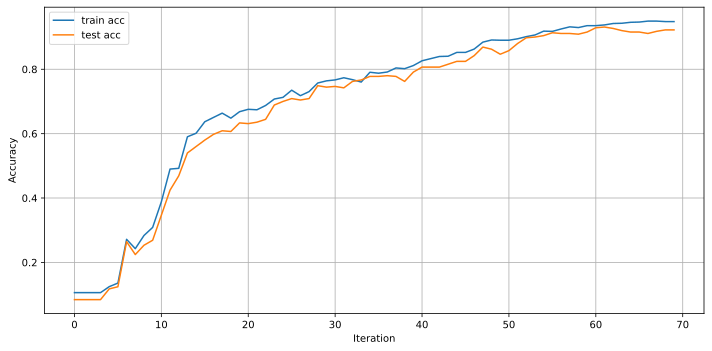

In [87]:
def make_network_with_dropout(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU, dropout_prob=0.9, dropout_number=1):
    network = []
    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))
        
        
        
        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
        # Add Dropout layer after each layer except the last one
        if layer_idx == dropout_number:
            
            network.append(Dropout(dropout_prob))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

network_with_dropout = make_network_with_dropout(input_size, 240, output_size, n_layers=5, dropout_prob=0.1,  dropout_number=3)
weights = get_weights(network_with_dropout)
cb = Callback(network_with_dropout, X_train, y_train, X_test, y_test)
res_with_dropout = minimize(
    compute_loss_grad, get_weights(network_with_dropout),
    args=[network_with_dropout, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    options={'maxiter': 100, 'ftol': 1e-8},
    callback=cb
)


set_weights(res_with_dropout["x"], network_with_dropout)

NLL_train_with_dropout = NLL(forward(network_with_dropout, X_train), y_train)
NLL_test_with_dropout = NLL(forward(network_with_dropout, X_test), y_test)
train_accuracy_with_dropout = accuracy_score(y_train, predict(network_with_dropout, X_train))
test_accuracy_with_dropout = accuracy_score(y_test, predict(network_with_dropout, X_test))

print("Train NLL with Dropout: {:.5f}".format(NLL_train_with_dropout))
print("Test NLL with Dropout: {:.5f}".format(NLL_test_with_dropout))
print("Train accuracy with Dropout: {:.5f}".format(train_accuracy_with_dropout))
print("Test accuracy with Dropout: {:.5f}".format(test_accuracy_with_dropout))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()


В ходе многократных построений и запусков нейронной сети с Dropout было установлено, что алгоритму удаётся обучиться, если hidden_layers_size достаточно большой, иначе остаётся мало нейронов в слое. Значение dropout_prob нужно устанавливать малым, чтобы оставалось больше нейронов. Нередко алгоритм выдавал нейронную сеть с очень малым качеством, поскольку изменение функции потерь было нулевым, но сами значения очень большие, нейроны просто не успевали обучаться из-за Dropout. Dropout случайным образом "выключает" нейроны во время обучения, это может привести к потере информации в небольших сетях, особенно если нейроны, содержащие важные признаки, будут выключены слишком часто. Dropout может привести к увеличению дисперсии градиентов, особенно в небольших сетях, где каждый нейрон может играть более значимую роль. Это может затруднить обучение и сделать процесс оптимизации менее стабильным. Таким образом, применение Dropout к простым задачам неэффективно.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.

In [88]:
class BatchNormalization:
    def __init__(self, input_count, epsilon=1e-5):
        self.input_count = input_count
        self.epsilon = epsilon
        self.gamma = np.ones(input_count)
        self.beta = np.zeros(input_count)
        self.running_mean = np.zeros(input_count)
        self.running_var = np.ones(input_count)
        self.params = [self.gamma, self.beta]

    def forward(self, input):
        self.input = input
        batch_mean = np.mean(input, axis=0)
        batch_var = np.var(input, axis=0)
        self.normalized_input = (input - batch_mean) / np.sqrt(batch_var + self.epsilon)
        return self.gamma * self.normalized_input + self.beta

    def backward(self, grad_output):
        N = grad_output.shape[0]
        self.grad_gamma = np.sum(grad_output * self.normalized_input, axis=0)
        self.grad_beta = np.sum(grad_output, axis=0)
        dx_norm = grad_output * self.gamma
        dvar = np.sum(dx_norm * (self.input - self.running_mean) * (-0.5) * np.power(self.running_var + self.epsilon, -1.5), axis=0)
        dmean = np.sum(dx_norm * (-1) / np.sqrt(self.running_var + self.epsilon), axis=0) + dvar * np.sum(-2 * (self.input - self.running_mean), axis=0) / N
        return dx_norm / np.sqrt(self.running_var + self.epsilon) + dvar * 2 * (self.input - self.running_mean) / N + dmean / N, np.r_[(self.grad_gamma.ravel(),
                                                                                                                                        self.grad_beta.ravel())]

    def __repr__(self):
        return f'BatchNormalization()'


In [91]:
def make_network_with_batchnorm(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []
    for layer_idx in range(n_layers):
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        network.append(Dense(layer_in, layer_out))
        network.append(BatchNormalization(layer_out))
        if layer_idx != n_layers - 1:
            network.append(activation_class())
    network.append(LogSoftmax())
    return network


network_with_batchnorm = make_network_with_batchnorm(input_size, 140, output_size, 30)

res_with_batchnorm = minimize(
    compute_loss_grad, get_weights(network_with_batchnorm),
    args=[network_with_batchnorm, X_train, y_train],
    method="L-BFGS-B",
    jac=True
)

set_weights(res_with_batchnorm["x"], network_with_batchnorm)
NLL_train_with_batchnorm = NLL(forward(network_with_batchnorm, X_train), y_train)
NLL_test_with_batchnorm = NLL(forward(network_with_batchnorm, X_test), y_test)
train_accuracy_with_batchnorm = accuracy_score(y_train, predict(network_with_batchnorm, X_train))
test_accuracy_with_batchnorm = accuracy_score(y_test, predict(network_with_batchnorm, X_test))
print("Train NLL with BatchNormalization: {:.5f}".format(NLL_train_with_batchnorm))
print("Test NLL with BatchNormalization: {:.5f}".format(NLL_test_with_batchnorm))
print("Train accuracy with BatchNormalization: {:.5f}".format(train_accuracy_with_batchnorm))
print("Test accuracy with BatchNormalization: {:.5f}".format(test_accuracy_with_batchnorm))

network_with_batchnorm = make_network(input_size, 140, output_size, 30)

res = minimize(
    compute_loss_grad, get_weights(network),
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True
)
set_weights(res["x"], network)
NLL_train = NLL(forward(network, X_train), y_train)
NLL_test = NLL(forward(network, X_test), y_test)
train_accuracy = accuracy_score(y_train, predict(network, X_train))
test_accuracy = accuracy_score(y_test, predict(network, X_test))
print("Train NLL: {:.5f}".format(NLL_train))
print("Test NLL: {:.5f}".format(NLL_test))
print("Train accuracy: {:.5f}".format(train_accuracy))
print("Test accuracy: {:.5f}".format(test_accuracy))

Train NLL with BatchNormalization: 1.41260
Test NLL with BatchNormalization: 2.99708
Train accuracy with BatchNormalization: 0.57684
Test accuracy with BatchNormalization: 0.12000
Train NLL: 0.00000
Test NLL: 0.23174
Train accuracy: 1.00000
Test accuracy: 0.96889


* NLL:
При использовании BatchNormalization значение NLL как на обучающем, так и на тестовом наборе данных увеличивается по сравнению с сетью без BatchNormalization. Это может быть связано с тем, что BatchNormalization вносит некоторое шумное влияние на данные, что увеличивает сложность модели и значение функции потерь.
* Accuracy:
При использовании BatchNormalization точность обучающего и тестового набора уменьшается. Это может быть связано с переобучением сети в результате внесения шума в данные BatchNormalization. 
